In [1]:
import numpy as np
import sys
sys.path.append("../")
from mapping_tools.colour_mapping_tools import *
from mapping.mapping_functions import *

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


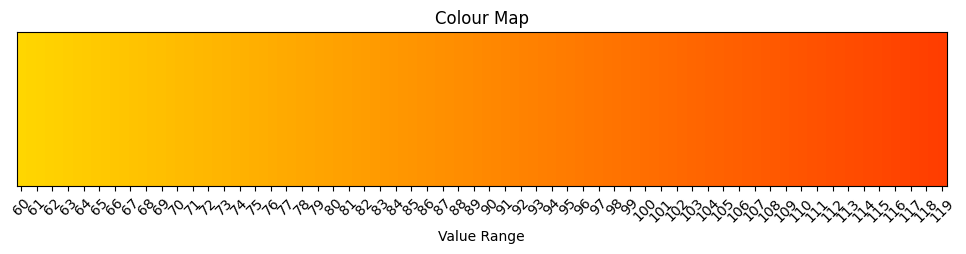

In [9]:
# plot the rgb colour map of a range of values set in x - simulates a mapping range - uncomment the example you want to run

range_min = 60 # range minimum value
range_max = 120 # range maximum value

x = np.linspace(range_min, range_max, 100) # set the range of values to be mapped with the first two arguments being the min and max of the range, and the third argument being the number of points in the range for visualisation
x = range_scaler(x, 0, 1, range_min, range_max)

# example 1
r_functions = [ones]
g_functions = [flip_range, offset, scale]
b_functions = [zeros]
r_kwargs_list = [{}, {}, {"offset":0.5}]
g_kwargs_list = [{"min":0, "max":1}, {"offset":0.4}, {"scale":0.6}]   
b_kwargs_list = []

# example 2
# r_functions = [flip_range, offset, scale]
# g_functions = [ones]
# b_functions = [zeros]
# r_kwargs_list = [{"min":0, "max":1}, {"offset":0.4}, {"scale":0.6}]
# g_kwargs_list = []
# b_kwargs_list = []

# example 3
# r_functions = [zeros]
# g_functions = [zeros]
# b_functions = [identity]
# r_kwargs_list = []
# g_kwargs_list = []
# b_kwargs_list = []

# example 4
# r_functions = [sine]
# g_functions = [cosine]
# b_functions = [identity]
# r_kwargs_list = []
# g_kwargs_list = []
# b_kwargs_list = []

r, g, b = dimensionality_expansion(x, channel_functions=[r_functions, g_functions, b_functions], channel_kwargs_list=[r_kwargs_list, g_kwargs_list, b_kwargs_list])

ticks = np.linspace(0, len(r)-1, range_max-range_min)  # ticks for the x-axis
labels = np.arange(range_min, range_max, 1)
plot_colour_map(r, g, b, plot_range=True, ticks=ticks, labels=labels, title="Colour Map")#, highlight_indices=[98-60, 90-60, 62-60, 86-60])

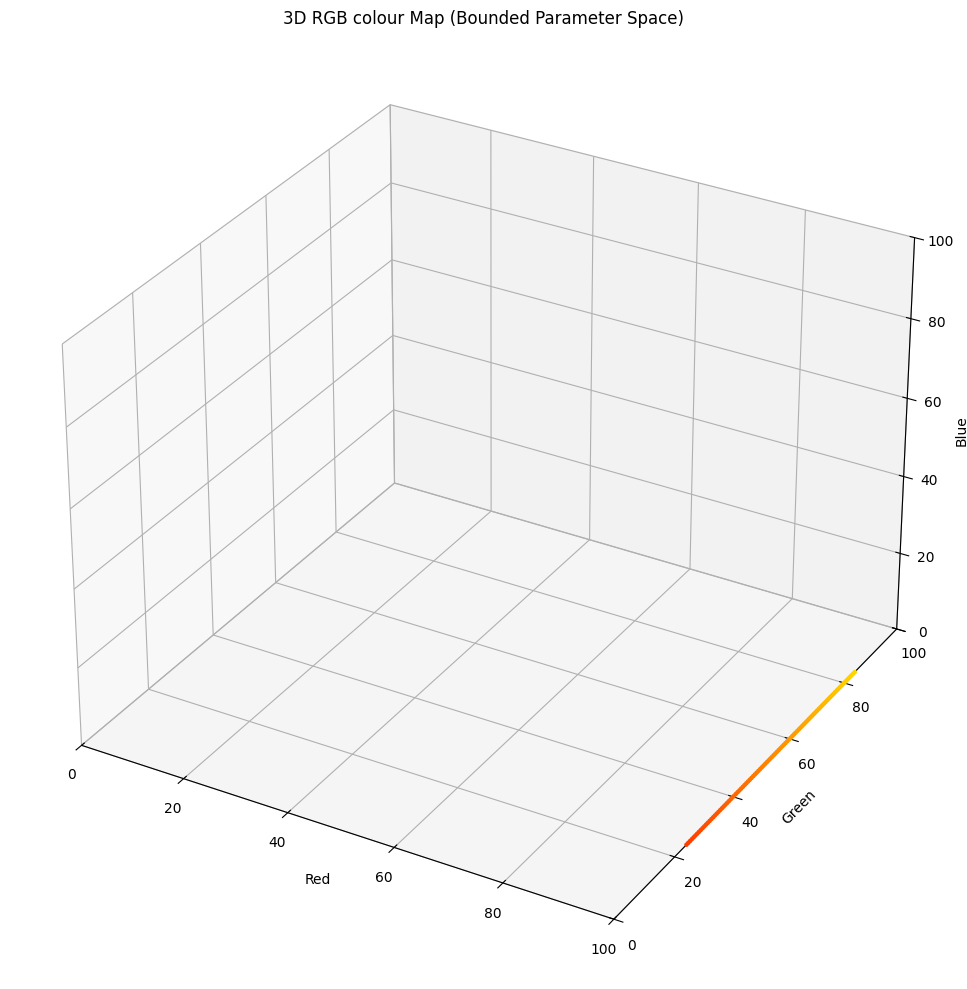

In [10]:
# plot the colour range in a 3D RGB colourmap

plot_rgb_3d_colourmap(r, g, b)

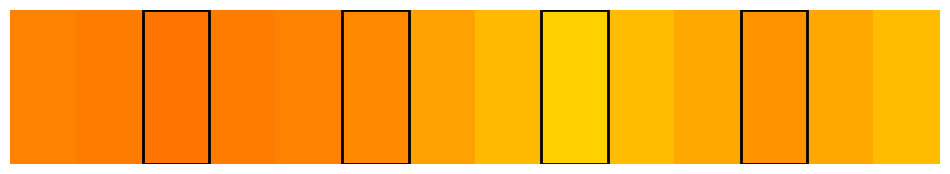

In [11]:
# simulate a mapping array and spatially expand to visualise the colour mapping

mapping_array = np.array([98, 90, 62, 86])
mapping_array = range_scaler(mapping_array, 0, 1, range_min, range_max)

r, g, b = dimensionality_expansion(mapping_array, channel_functions=[r_functions, g_functions, b_functions], channel_kwargs_list=[r_kwargs_list, g_kwargs_list, b_kwargs_list])

original_indices = np.array([2, 5, 8, 11]) # set the anchor points for interpolation
light_size = 14 # set the number of leds

interpolated_r = interpolate_1d(r, light_size, original_indices)
interpolated_g = interpolate_1d(g, light_size, original_indices)
interpolated_b = interpolate_1d(b, light_size, original_indices)

plot_colour_map(interpolated_r, interpolated_g, interpolated_b, highlight_indices=original_indices, title="")